[CHECK] fileList : ['LSH0553/BostonHousing(original)-1.xls']
[CHECK] mean :        CRIM         ZN      INDUS     CHAS       NOX        RM        AGE  \
0  3.613524  11.363636  11.136779  0.06917  0.554695  6.284634  68.574901   

        DIS       RAD         TAX    PTRATIO           B      LSTAT  \
0  3.795043  9.549407  408.237154  18.455534  356.674032  12.653063   

        MEDV  CAT. MEDV  
0  22.532806   0.166008  
[CHECK] median :       CRIM   ZN  INDUS  CHAS    NOX      RM   AGE      DIS  RAD    TAX  \
0  0.25651  0.0   9.69   0.0  0.538  6.2085  77.5  3.20745  5.0  330.0   

   PTRATIO       B  LSTAT  MEDV  CAT. MEDV  
0    19.05  391.44  11.36  21.2        0.0  
[CHECK] quart :                  0.25       0.50        0.75
CRIM         0.082045    0.25651    3.677083
ZN           0.000000    0.00000   12.500000
INDUS        5.190000    9.69000   18.100000
CHAS         0.000000    0.00000    0.000000
NOX          0.449000    0.53800    0.624000
RM           5.885500    6.20850

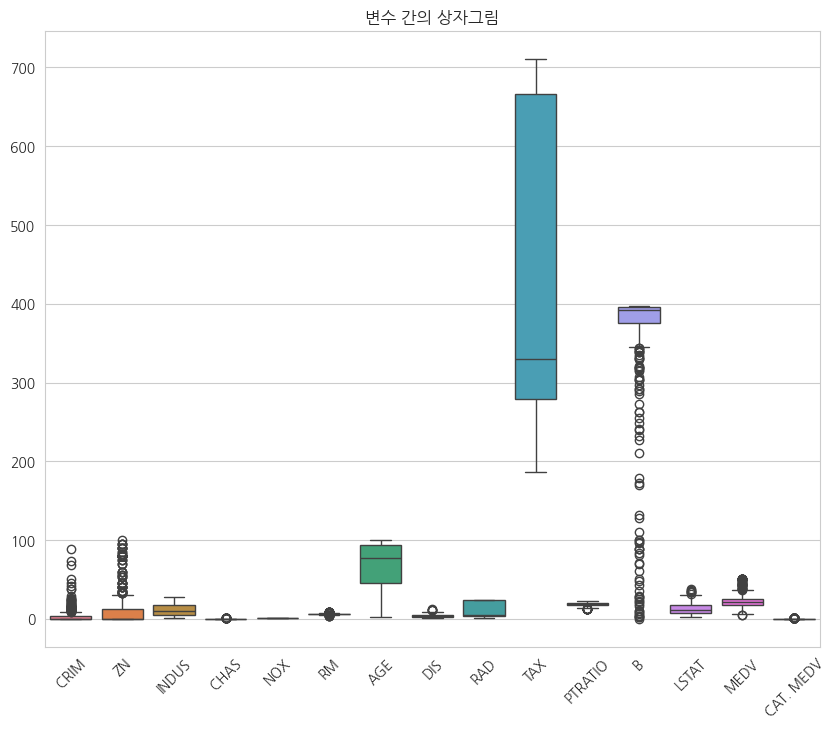

[CHECK] corData :                CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM       1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN        -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS      0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS      -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX        0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM        -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE        0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS       -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD        0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX        0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO    0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
B         -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069   
LSTAT      0.455621 -0.412995  0.

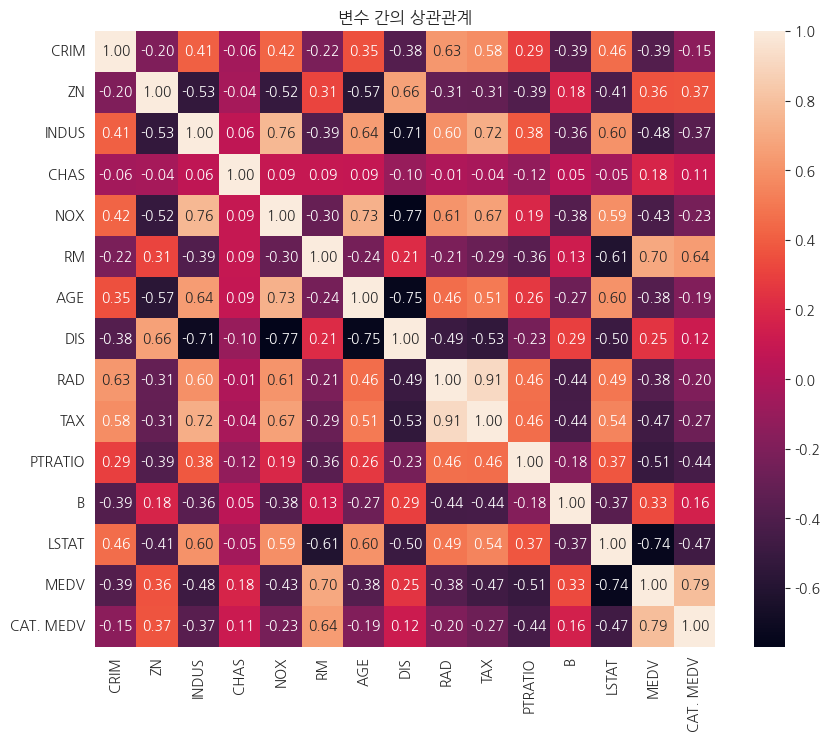

In [37]:
# ============================================
# 요구사항
# ============================================
# Python을 이용한 10년 대기 중금속 농도 예측 및 시각화


# ============================================
# 한글 폰트 설치
# ============================================
# # 한글폰트 사용 in colab
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# ============================================
# 라이브러리
# ============================================
import glob
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

# ============================================
# 보조
# ============================================

# ============================================
# 주요
# ============================================
# 그림 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
serviceName = 'LSH0553'

# 데이터 읽기
inpFile = '{}/{}'.format(serviceName, 'BostonHousing(original)-1.xls')
fileList = sorted(glob.glob(inpFile))
print(f'[CHECK] fileList : {fileList}')

data = pd.read_excel(fileList[0])
# print(f'[CHECK] data : {data}')

# 2. 기초통계량
# 평균, 중앙값, 사분위수, 사분위수 범위, 범위, 표준편차, 분산
mean = data.mean().to_frame().T
print(f'[CHECK] mean : {mean}')

median = data.median().to_frame().T
print(f'[CHECK] median : {median}')

quart = data.quantile([0.25, 0.5, 0.75]).T
print(f'[CHECK] quart : {quart}')

range = (data.max() - data.min()).to_frame().T
print(f'[CHECK] range : {range}')

std = data.std().to_frame().T
print(f'[CHECK] std : {std}')

var = data.var().to_frame().T
print(f'[CHECK] var : {var}')

# 3. BOX-PLOT
# 각 변수별 Q1, Q2, Q3를 통해 데이터의 밀집 정도 이상점을 파악할 수 있도록 BOX도표를 그린다.
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.title('변수 간의 상자그림')
plt.xticks(rotation=45)
plt.show()

# 4. 변수들 간의 상관관계
corData = data.corr()
print(f'[CHECK] corData : {corData}')

plt.figure(figsize=(10, 8))
sns.heatmap(corData, annot=True, fmt=".2f")
plt.title("변수 간의 상관관계")
plt.show()